<a href="https://colab.research.google.com/github/NahuelCostaCortez/rapidae/blob/main/examples/beta_vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beta VAE

Beta-VAE is an extension of the Variational Autoencoder (VAE) with a regularization parameter, beta, that controls the balance between reconstruction fidelity and latent space structure. It promotes disentangled feature learning for interpretable representations. Applications include image synthesis with controlled features, domain adaptation, and representation learning for downstream tasks. Beta-VAE's versatility allows users to customize models for specific trade-offs between reconstruction accuracy and capturing meaningful latent factors, making it useful in various generative and unsupervised learning scenarios.

In [ ]:
# Install the library

!pip install rapidae

In [3]:
from keras import utils
from rapidae.data import load_MNIST
from rapidae.models import Beta_VAE
from rapidae.models.base import VAE_Encoder_Conv_MNIST, VAE_Decoder_Conv_MNIST
from rapidae.pipelines import TrainingPipeline
from rapidae.evaluate import plot_reconstructions, plot_samplings_from_latent

### Download and preprocess the dataset

In this example, the selected dataset is the well-known MNIST composed of handwritten digit images.

Train and test data are normalized.

In [4]:
# Load MNIST dataset
data = load_MNIST()

x_train = data["x_train"].astype("float32") / 255
x_test = data["x_test"].astype("float32") / 255

# Obtain number of clasess
n_classes = len(set(data["y_train"]))

2024-04-16 08:23:29 [INFO]: Downloading train-images-idx3-ubyte.gz...
2024-04-16 08:23:29 [INFO]: Downloading train-labels-idx1-ubyte.gz...
2024-04-16 08:23:29 [INFO]: Downloading t10k-images-idx3-ubyte.gz...
2024-04-16 08:23:29 [INFO]: Downloading t10k-labels-idx1-ubyte.gz...


2024-04-16 08:23:29 [INFO]: Deleting MNIST data...


### Model creation

In this example, we are using a beta VAE.  
The regularization parameter can be tuned to improve the results.  
The default value of beta is 1.0, meaning it will work as a regular VAE if not modified.

In [9]:
# Model creation
model = Beta_VAE(input_dim=x_train.shape[1:], 
                 latent_dim=2, 
                 beta=0.5,
                 encoder=VAE_Encoder_Conv_MNIST,
                 decoder=VAE_Decoder_Conv_MNIST)

2024-04-16 08:26:01 [INFO]: Using provided encoder
2024-04-16 08:26:01 [INFO]: Encoder is a class, initializing...
2024-04-16 08:26:01 [INFO]: Using provided decoder
2024-04-16 08:26:01 [INFO]: Decoder is a class, initializing...
2024-04-16 08:26:01 [INFO]: Using binary_crossentropy as the reconstruction loss function


### Training pipeline

In [11]:
pipe = TrainingPipeline(name='beta_VAE_MNIST', 
                        learning_rate=0.001,
                        model=model,
                        num_epochs=30,
                        batch_size=128)

trained_model = pipe(x=x_train)

2024-04-16 08:27:22 [INFO]: +++ beta_VAE_MNIST +++
2024-04-16 08:27:22 [INFO]: Creating folder in ./output_dir/beta_VAE_MNIST_2024-04-16_08-27
2024-04-16 08:27:22 [INFO]: 
TRAINING STARTED
	Backend: tensorflow
	Eager mode: False
	Validation data available: False
	Callbacks set: ['EarlyStopping', 'ModelCheckpoint'] 



Epoch 1/30


2024-04-16 08:27:22.994506: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.



Epoch 1: loss improved from inf to 161.43755, saving model to ./output_dir/beta_VAE_MNIST_2024-04-16_08-27/model.weights.h5
469/469 - 36s - 77ms/step - kl_loss: 6.0037 - loss: 161.4375 - reconstruction_loss: 158.4357
Epoch 2/30

Epoch 2: loss improved from 161.43755 to 157.48880, saving model to ./output_dir/beta_VAE_MNIST_2024-04-16_08-27/model.weights.h5
469/469 - 38s - 82ms/step - kl_loss: 6.2328 - loss: 157.4888 - reconstruction_loss: 154.3724
Epoch 3/30

Epoch 3: loss improved from 157.48880 to 155.28305, saving model to ./output_dir/beta_VAE_MNIST_2024-04-16_08-27/model.weights.h5
469/469 - 35s - 74ms/step - kl_loss: 6.4136 - loss: 155.2831 - reconstruction_loss: 152.0762
Epoch 4/30

Epoch 4: loss improved from 155.28305 to 153.85927, saving model to ./output_dir/beta_VAE_MNIST_2024-04-16_08-27/model.weights.h5
469/469 - 34s - 73ms/step - kl_loss: 6.5314 - loss: 153.8593 - reconstruction_loss: 150.5934
Epoch 5/30

Epoch 5: loss improved from 153.85927 to 152.83107, saving model 

2024-04-16 08:44:29 [INFO]: Restoring best model
2024-04-16 08:44:29 [INFO]: Best model restored


### Evaluation step

Once the model is trained we can sample from the latent space to generate a 2D manifold of decoded samples

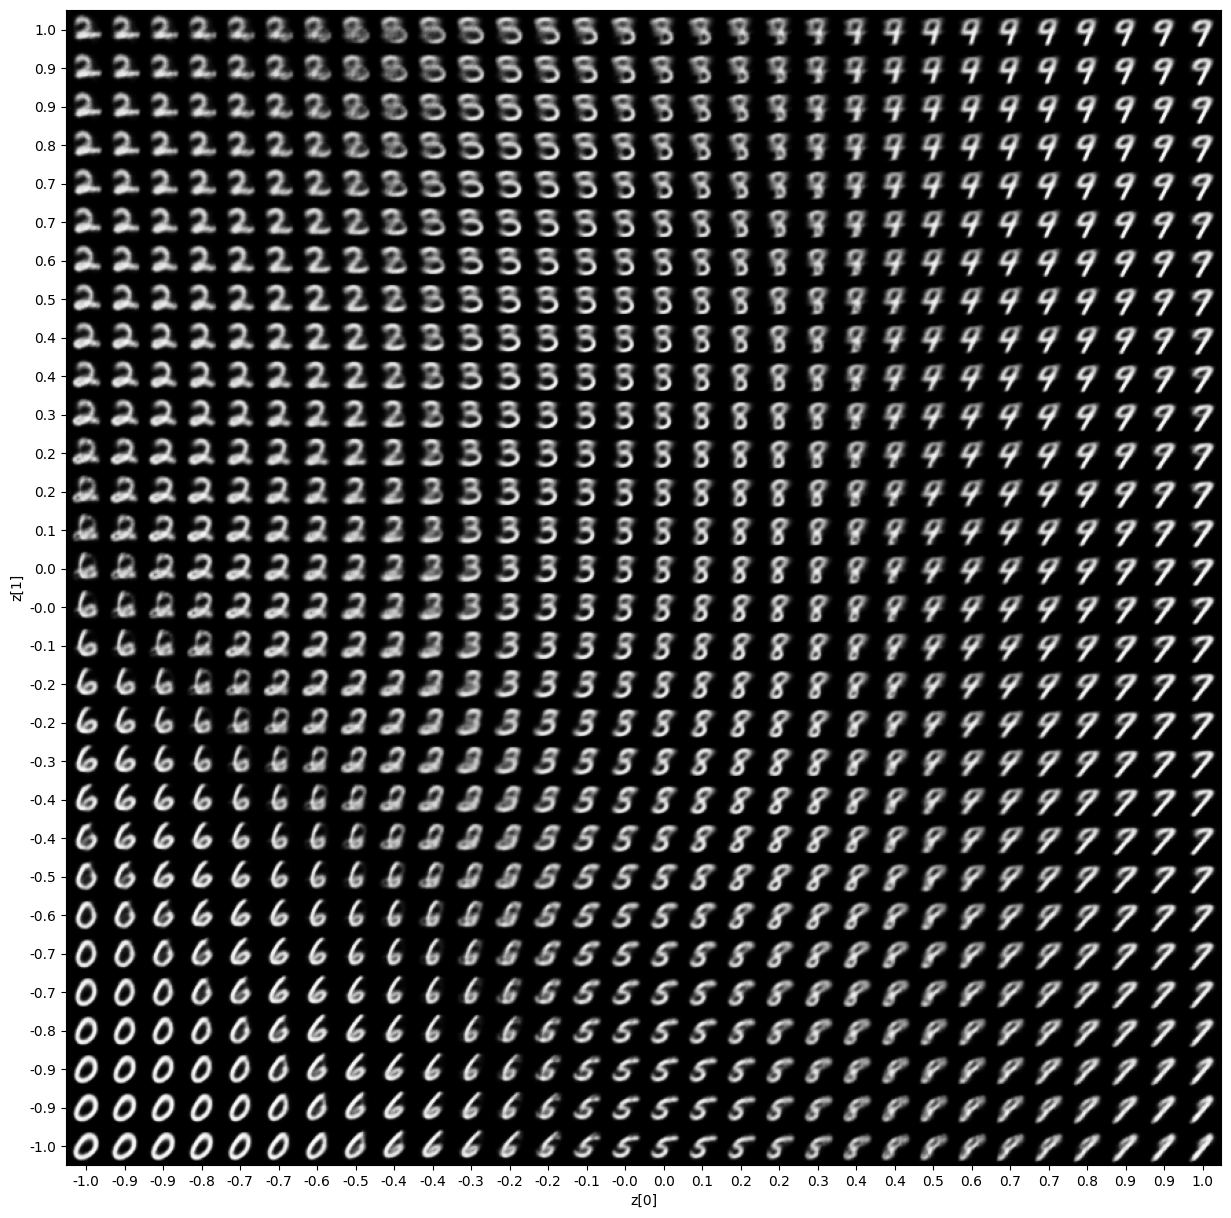

In [12]:
plot_samplings_from_latent(trained_model)

And here are the reconstructions

  8/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


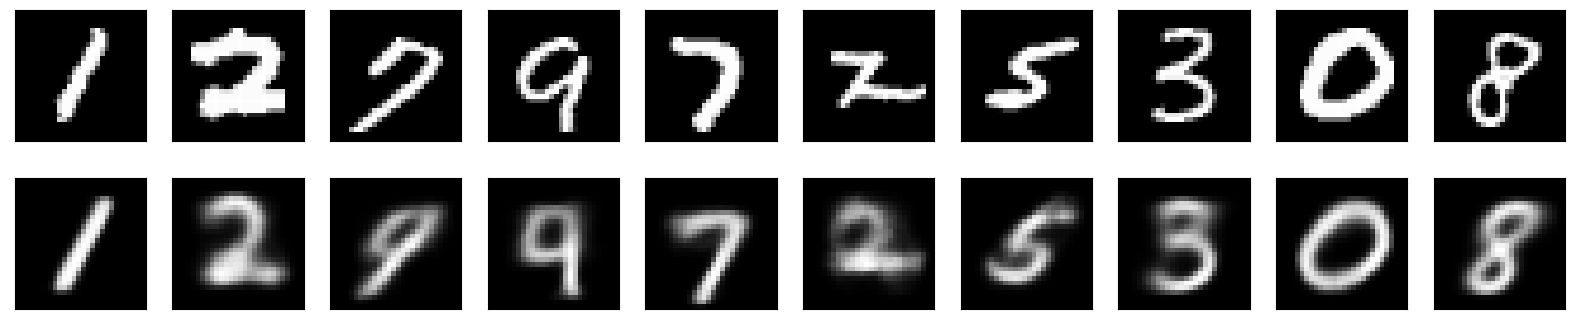

In [14]:
outputs = trained_model.predict(x_test)

plot_reconstructions(x_test, outputs['x_recon'])